<a href="https://colab.research.google.com/github/alexis12895/TFG_practica/blob/main/Redes_neuronales_conceptos/conceptos_tensorFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.constant([[1., 2., 3.],
                [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [ ]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [ ]:
x @ tf.transpose(x) #@ es lo mismo que hacer x * tf.transpose(x) , es para multiplicar matrices, en lugar de usar tf.matlmul

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [ ]:
tf.concat([x,x,x], axis=0)  #concateno tensores

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
tf.nn.softmax(x,axis=-1)  #el valor mas alto tendra la probabilidad mas alta

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [ ]:
tf.reduce_sum(x)  #Es una reduccion en funcion de sus dimensiones, en este caso suma TODOS LOS VALORES, por que esta en ambas dimensiones, rows and columns

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

Para mas info clara sobre reduce.sum:
[texto del enlace](https://stackoverflow.com/questions/47157692/how-does-reduce-sum-work-in-tensorflow)

In [ ]:
#Uso del hardware (GPU) para tensorFLOW

if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [ ]:
var = tf.Variable([0.0, 0.0, 0.0])

In [ ]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
var.assign_add([1, 1, 1]) #le añade , le suma, un 1 al vector anterior

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [ ]:
# calculo de derivadas, que se usan para el calculo del descenso del gradiente

x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [ ]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [ ]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x) #g(x) = dy/dx // se aplica la derivada f(x) en la dim y

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [ ]:
#Para guardar una funcion en tensorFlow separandola de Phyton
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x) #Nos devuelve la suma del vector

In [ ]:
x = tf.constant([1, 2, 3])
my_func(x)  #No imprimira nada ya que eso es parte de python y este funcion solo se ha guardado para el uso de TensorFlow

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [ ]:
x = tf.constant([10, 9, 8])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [ ]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

MODELOS Y CAPAS

In [ ]:
#creamos un modelo
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function  #Definimos funciones dentro de TensorFlow
  def multiply(self, x):
    return x * self.weight

In [ ]:
#tamano de sel.weigh = dimension de x(shape)
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([10. ,  9.1,  8.2], dtype=float32)>

In [ ]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))  #Llamamos al metodo multuply y como ves multiplica el ancho de el vector x(shape =3) por el vector que le pasamos por el parametro

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
save_path = './saved'
tf.saved_model.save(mod, save_path) #guardamos el modelo

INFO:tensorflow:Assets written to: ./saved/assets


In [ ]:
#cargamos el modelo
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

BUCLES DE ENTRENAMIENTO

In [ ]:
#Genera un grafico con unos x datos que nos daran una nube de puntos y luego crearemos un modelo y entrenaremos estos datos
import matplotlib
from matplotlib import pyplot as plt

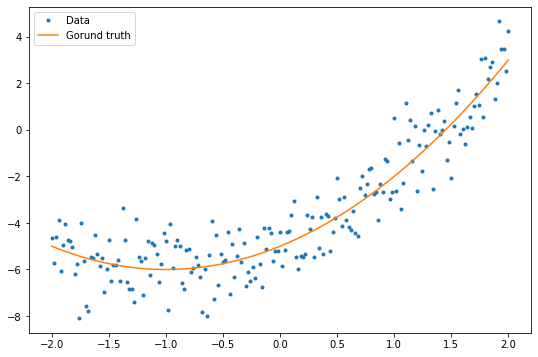

In [ ]:
matplotlib.rcParams['figure.figsize'] = [9,6] #El tamanyo de del grafico generado

x = tf.linspace(-2, 2, 201) #sobre el eje x, empieza, termina, numero de puntos de la recta
x = tf.cast(x , tf.float32) #hacemos un cast a flotante

#definimos la funcion de la derivada
def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])  #me da los valores aleatorios de la recta

plt.plot(x.numpy(), y.numpy(), '.', label='Data') #LE PASO en el eje x e y la cadena de puntos, los datos , data
plt.plot(x, f(x), label = 'Gorund truth') #le paso la derivada en y y sera el resultado de la funcinon
plt.legend();

In [ ]:
#Creamos el modelo para luego entrenarlo
class Model(tf.keras.Model):
  def __init__(self,units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=units,  #con Dense creo las capas
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(1)
  
  #llamada a la funcion
  def call(self, x, training=True):
    x = x[:, tf.newaxis]
    x = self.dense1(x)
    x = self.dense2(x)
    return tf.squeeze(x, axis=1)  #Nos elimina dimensiones de tamaño 1

In [ ]:
model = Model(64) #llamamos al model

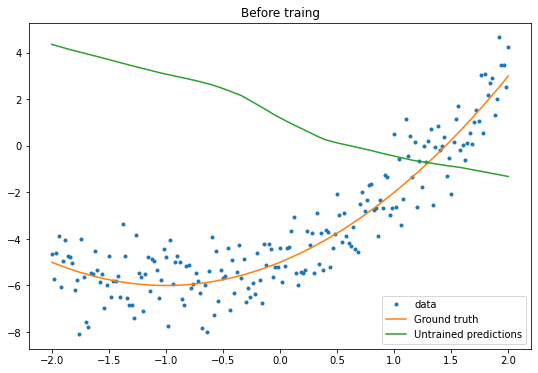

In [ ]:
plt.plot(x.numpy(), y.numpy(), '.', label= 'data')
plt.plot(x , f(x), label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions') #la preccion no entrenada aun
plt.title('Before traing')
plt.legend();

In [ ]:
#Entrenamos el modelo

variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01) #la velocidad de aprendizaje

for step in range(1000):
  with tf.GradientTape() as tape: #Definimos el descenso del gradiente
    prediction = model(x)
    error = (y-prediction)**2
    mean_error = tf.reduce_mean(error)  #error cuadratico medio: mide la cantidad de error entre dos conjuntos de datos, compara un valor predicho con un valor ya observado
  gradient = tape.gradient(mean_error, variables)
  optimizer.apply_gradients(zip(gradient, variables))

  if step % 100 == 0: #Cuando termine la ejecucion
    print(f'Mean squared error: {mean_error.numpy(): 0.3f}')

Mean squared error:  44.210
Mean squared error:  1.076
Mean squared error:  1.066
Mean squared error:  1.061
Mean squared error:  1.057
Mean squared error:  1.054
Mean squared error:  1.051
Mean squared error:  1.049
Mean squared error:  1.047
Mean squared error:  1.045


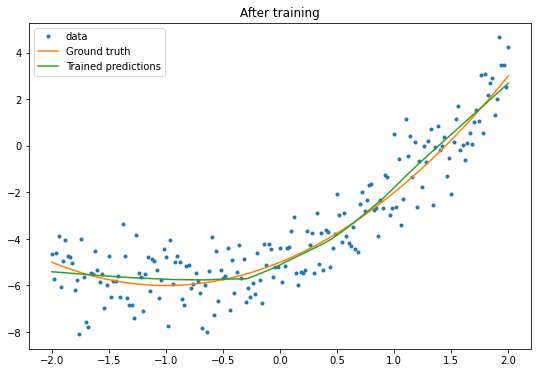

In [ ]:
#Dibujamos el grafico del entrenamiento
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x), label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')  #Esta el modelo ya entrenado
plt.title('After training')
plt.legend();

In [ ]:
#Creamos un entrenamiento
new_model = Model(64)

In [ ]:
new_model.compile(
    loss = tf.keras.losses.MSE,
    optimizer = tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,   #Numero de iteraciones sobres LOS DATOS TOTALES DE X E Y
                        batch_size=32, #Numero de muestras que se actualizan por gradiente
                        verbose=0)

model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model/assets


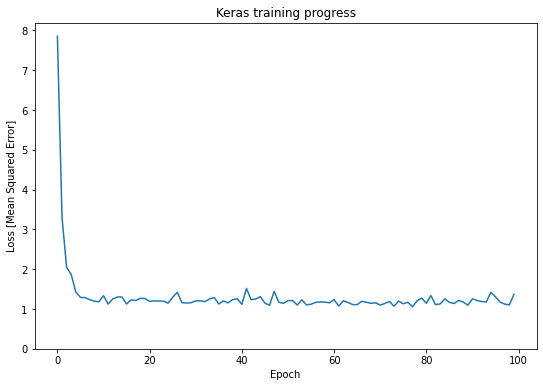

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])  #limitamos el rango desde 0 hasta el maximo de y
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');